In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
import numpy as np

In [3]:
from glob import glob

In [4]:
def aggregate(maps):
    hpmap = np.zeros(12*256*256)

    for mapi in maps:
        hmapi = hp.read_map(mapi, verbose=False)
        nonan = ~np.isnan(hmapi)
        hpmap[nonan] += hmapi[nonan]
        print(np.percentile(hmapi[nonan], [0, 100]))

    hpmap[hpmap==0.] = np.nan    
    return hpmap

In [4]:
## NN ts
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ts/nn_plain_ts_*/nn-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
#hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/nn-weights-ts-v0.3hp256.fits', nnts, fits_IDL=False)

## NN CCD
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ccd/nn_plain_ccd_*/nn-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
#hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/nn-weights-ccd-v0.3hp256.fits', nnts, fits_IDL=False)


# lin ccd
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ccd/mult_ccd_*/lin-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
# hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/lin-weights-ccd-v0.3hp256.fits', nnts, fits_IDL=False)

# lin ts
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ts/mult_ts_*/lin-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
# hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/lin-weights-ts-v0.3hp256.fits', nnts, fits_IDL=False)

['/home/mehdi/data/formehdi/0.3/regression_decals_ccd/mult_ccd_decals/quad-weights.hp256.fits', '/home/mehdi/data/formehdi/0.3/regression_decaln_ccd/mult_ccd_decaln/quad-weights.hp256.fits', '/home/mehdi/data/formehdi/0.3/regression_bmzls_ccd/mult_ccd_bmzls/quad-weights.hp256.fits']
[0.         2.50779302]
[0.         2.22915946]
[0.         1.32085675]


/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:345: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1196: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1155: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:1176: RuntimeWarning: invalid value encountered in less
  result.data[result.data < 0] = 0.0
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/projaxes.py:11

['/home/mehdi/data/formehdi/0.3/regression_decals_ts/mult_ts_decals/quad-weights.hp256.fits', '/home/mehdi/data/formehdi/0.3/regression_decaln_ts/mult_ts_decaln/quad-weights.hp256.fits', '/home/mehdi/data/formehdi/0.3/regression_bmzls_ts/mult_ts_bmzls/quad-weights.hp256.fits']
[0.        5.7122975]
[0.         1.27415918]
[0.         1.81648264]


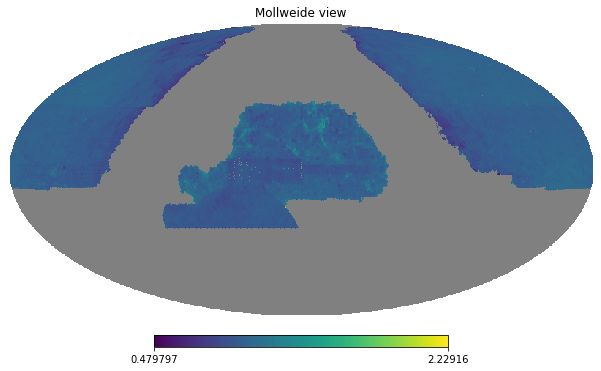

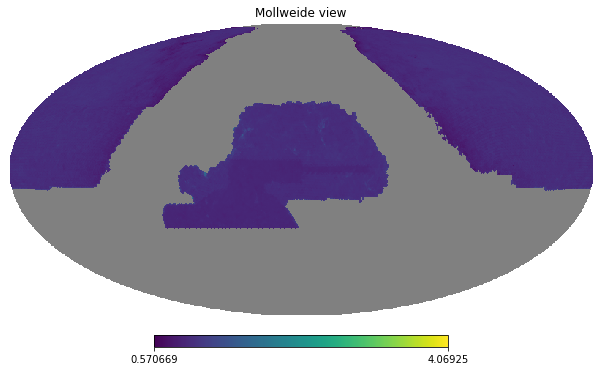

In [5]:
# quad ccd
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ccd/mult_ccd_*/quad-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/quad-weights-ccd-v0.3hp256.fits', nnts, fits_IDL=False)

# quad ts
maps = glob('/home/mehdi/data/formehdi/0.3/regression_*_ts/mult_ts_*/quad-weights.hp256.fits')
print(maps)
nnts = aggregate(maps)
hp.mollview(nnts)
hp.write_map('/home/mehdi/data/formehdi/0.3/quad-weights-ts-v0.3hp256.fits', nnts, fits_IDL=False)

In [6]:
ls /home/mehdi/data/formehdi/0.3/

lin-weights-ccd-v0.3hp256.fits   regression_bmzls_ccd/
lin-weights-ts-v0.3hp256.fits    regression_bmzls_ts/
nn-weights-ccd-v0.3hp256.fits    regression_decaln_ccd/
nn-weights-ts-v0.3hp256.fits     regression_decaln_ts/
quad-weights-ccd-v0.3hp256.fits  regression_decals_ccd/
quad-weights-ts-v0.3hp256.fits   regression_decals_ts/


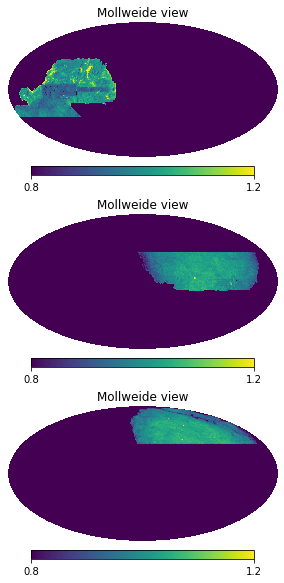

In [20]:
plt.figure(figsize=(8, 10))
for i,mapi in enumerate(maps):
    plt.subplot(311+i)
    dmapi = hp.read_map(mapi, verbose=False)
    hp.mollview(dmapi, hold=True, min=0.8, max=1.2, rot=-89)